Predict the car price of use cars
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:
1.name
2.year
3.selling_price
4.km_driven
5.fuel
6.seller_type
7.transmission
8.Owner

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [107]:
car_dataset = pd.read_csv(r"C:\Users\USER\Documents\Machine Learning Project\car data.csv")

In [108]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [109]:
car_dataset.shape

(301, 9)

In [110]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [111]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [112]:
car_dataset['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [113]:
car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [114]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [115]:
car_dataset = car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1, 'CNG':2},
                                  'Seller_Type':{'Dealer': 0, 'Individual':1},
                                  'Transmission': {'Manual': 0, 'Automatic': 1}})

In [116]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Spliting the features and target

In [117]:
X= car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis= 1)
Y = car_dataset['Selling_Price']

In [118]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

#### train and test spliting

In [119]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size= 0.1, random_state= 2)

In [120]:
print(X_train.shape, Y_train.shape, X_test.shape)

(270, 7) (270,) (31, 7)


#### Training Model

In [121]:
lin_reg_model= LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

#### Model Evaluation

In [122]:
X_train_prediction = lin_reg_model.predict(X_train)

In [123]:
Error_score= metrics.r2_score(X_train_prediction, Y_train)
print(f'The R squared Error is {Error_score}')

The R squared Error is 0.8635655509198658


#### Visualize the actual and predicted prices

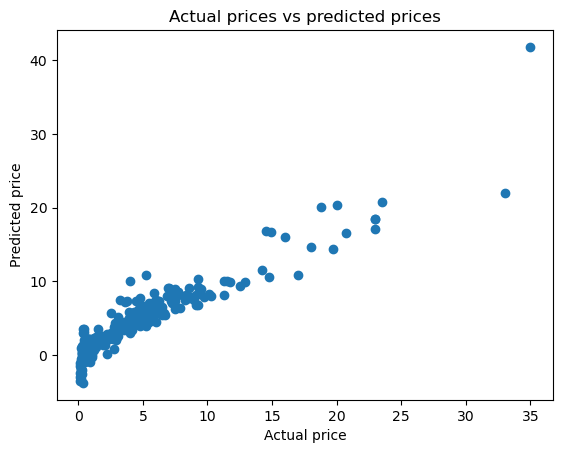

In [124]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs predicted prices')
plt.show()

#### Test data Evaluation

In [125]:
X_test_prediction = lin_reg_model.predict(X_test)

In [126]:
Error_score= metrics.r2_score(X_test_prediction, Y_test)
print(f'The R squared Error is {Error_score}')

The R squared Error is 0.8062199941176269


#### Visulation of Actual prices vs predicted prices

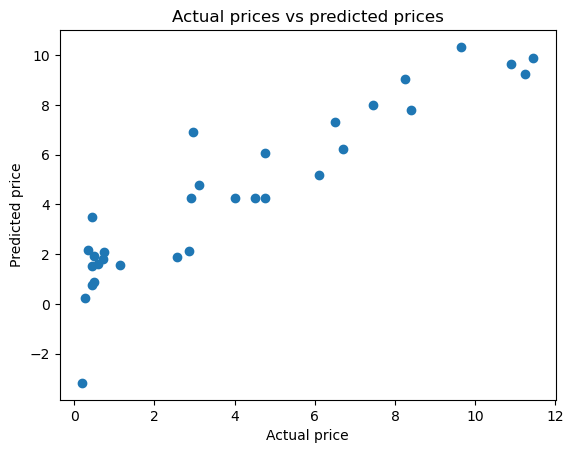

In [127]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs predicted prices')
plt.show()

In [128]:
Lasso_model = Lasso()
Lasso_model.fit(X_train, Y_train)

Lasso()

In [136]:
X_train_prediction = Lasso_model.predict(X_train)

In [137]:
Error_score = metrics.r2_score(X_train_prediction, Y_train)
print(f'The R squared Error is {Error_score}')

The R squared Error is 0.798459024070425


In [138]:
X_test_prediction = Lasso_model.predict(X_test)

In [139]:
Error_score = metrics.r2_score(X_test_prediction, Y_test)
print(f'The R squared Error is {Error_score}')

The R squared Error is 0.7711110403265475


#### Visulation of Actual prices vs predicted prices

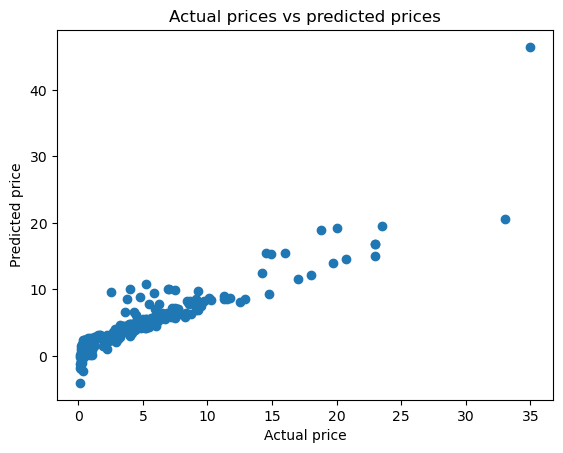

In [140]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs predicted prices')
plt.show()

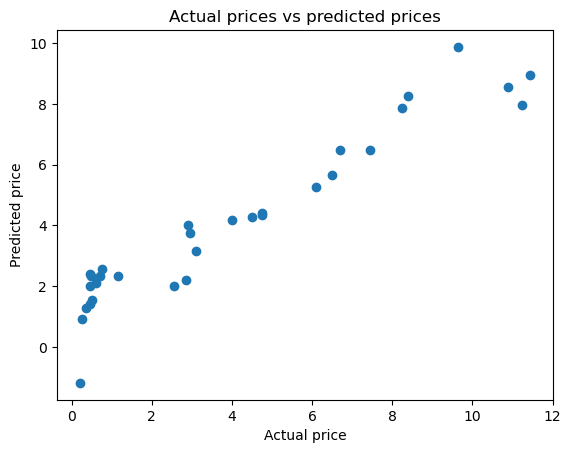

In [141]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual prices vs predicted prices')
plt.show()